In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
xpointsR = []
ypointsR = []

xpointsG = []
ypointsG = []

In [3]:
#@title demo1
%%file demo1
20	15 
2	24	3	12	9	17	4	27	0	21	6	25	8	27	7	26	1	30	5	31	11	18	14	16	13	39	10	19	12	26
6	30	3	15	12	20	11	19	1	24	13	15	10	28	2	36	5	26	7	15	0	11	8	23	14	20	9	26	4	28
6	35	0	22	13	23	7	32	2	20	3	12	12	19	10	23	9	17	1	14	5	16	11	29	8	16	4	22	14	22
9	20	6	29	1	19	7	14	12	33	4	30	0	32	5	21	11	29	10	24	14	25	2	29	3	13	8	20	13	18
11	23	13	20	1	28	6	32	7	16	5	18	8	24	9	23	3	24	10	34	2	24	0	24	14	28	12	15	4	18
8	24	11	19	14	21	1	33	7	34	6	35	5	40	10	36	3	23	2	26	4	15	9	28	13	38	12	13	0	25
13	27	3	30	6	21	8	19	12	12	4	27	2	39	9	13	14	12	5	36	10	21	11	17	1	29	0	17	7	33
5	27	4	19	6	29	9	20	3	21	10	40	8	14	14	39	13	39	2	27	1	36	12	12	11	37	7	22	0	13
13	32	11	29	8	24	3	27	5	40	4	21	9	26	0	27	14	27	6	16	2	21	10	13	7	28	12	28	1	32
12	35	1	11	5	39	14	18	7	23	0	34	3	24	13	11	8	30	11	31	4	15	10	15	2	28	9	26	6	33
10	28	5	37	12	29	1	31	7	25	8	13	14	14	4	20	3	27	9	25	13	31	11	14	6	25	2	39	0	36
0	22	11	25	5	28	13	35	4	31	8	21	9	20	14	19	2	29	7	32	10	18	1	18	3	11	12	17	6	15
12	39	5	32	2	36	8	14	3	28	13	37	0	38	6	20	7	19	11	12	14	22	1	36	4	15	9	32	10	16
8	28	1	29	14	40	12	23	4	34	5	33	6	27	10	17	0	20	7	28	11	21	2	21	13	20	9	33	3	27
9	21	14	34	3	30	12	38	0	11	11	16	2	14	5	14	1	34	8	33	4	23	13	40	10	12	6	23	7	27
9	13	14	40	7	36	4	17	0	13	5	33	8	25	13	24	10	23	3	36	2	29	1	18	11	13	6	33	12	13
3	25	5	15	2	28	12	40	7	39	1	31	8	35	6	31	11	36	4	12	10	33	14	19	9	16	13	27	0	21
12	22	10	14	0	12	2	20	5	12	1	18	11	17	8	39	14	31	3	31	7	32	9	20	13	29	4	13	6	26
5	18	10	30	7	38	14	22	13	15	11	20	9	16	3	17	1	12	2	13	12	40	6	17	8	30	4	38	0	13
9	31	8	39	12	27	1	14	5	33	3	31	11	22	13	36	0	16	7	11	14	14	4	29	6	28	2	22	10	17


Writing demo1


In [4]:
#@title demo
%%file demo
4 5
0 20 1 20 2 20 3 40 4 10
1 20 0 10 3 30 2 50 4 20
2 30 1 20 4 12 3 40 0 10
4 50 3 30 2 15 0 20 1 15

Writing demo


In [5]:
class JSSP:

  def __init__(self,files,repi):
     self.files=files
     self.rep=repi

  def run(self, returnn):
    with open(self.files) as f:
      n, m = [int(x) for x in f.readline().split()]
      jobs = np.zeros((n, m, 2), dtype=int)
      i = 0
      for line in f:
          jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
          i += 1

    mstart = np.zeros((max(n,m)), dtype=int)
    jend = np.zeros((max(n,m)), dtype=int)
    idxs = np.zeros((n), dtype=int)
    makespan = 0
    for e in self.rep:
      i = idxs[e]
      idxs[e] += 1
      midx = jobs[e, i, 0]
      time = jobs[e, i, 1]
      mstart[midx] = max(mstart[midx], jend[e]) + time
      jend[e] = mstart[midx]
      if mstart[midx] > makespan:
        makespan = mstart[midx]

    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((m), dtype=int)
    idxs = np.zeros((n), dtype=int)
    schedule = np.zeros((m*10, makespan))

    for e in self.rep:
      i = idxs[e]
      idxs[e] += 1
      midx = jobs[e, i, 0]
      time = jobs[e, i, 1]
      mstart[midx] = max(mstart[midx], jend[i])
      schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
      mstart[midx] += time
      jend[i] = mstart[midx]

    if(returnn=='schedule'):
      return schedule
    
    if(returnn=='jobs'):
      print(jobs)
    
    if(returnn=='makespan'):
      return makespan

In [6]:
from os import kill
class Genetic:

  def __init__(self,num_data,num_fitnes,files,num_iter):
    self.files=files
    self.num_data=num_data
    self.num_fitnes=num_fitnes
    self.num_iter=num_iter
    self.xpoints = []
    self.ypoints = []

  def generateMatrixAleatorio(self,size_array,n,m):
    arr=[]
    for k in range(size_array):
      rep = []
      for i in range(n):
        rep.extend(np.full(m,i))
      np.random.shuffle(rep)
      arr.append(rep)
    return arr

  def generateArrayAll(self,n,m):
    rep = []
    for i in range(n):
      rep.extend(np.full(m,i))
      np.random.shuffle(rep)
    return rep

  def run(self):
    with open(self.files) as f:
      n, m = [int(x) for x in f.readline().split()]
    arr=self.generateMatrixAleatorio(self.num_data,n,m)
  
    for i in range(self.num_iter):
      weight=[]
      weightxxx=[]
      for j in range(self.num_data):
        jssp= JSSP(self.files,arr[j])
        aux = jssp.run('makespan')
        self.schedule = jssp.run('schedule')
        weight.append(aux)
        weightxxx.append(aux)
      
      auxweight=weight
      indexweight=[]
      for j in range(self.num_fitnes):
        indexweight.append(auxweight.index(min(auxweight)))
        auxweight.insert(auxweight.index(min(auxweight)),2000)
        auxweight.remove(min(auxweight))

      auxsum=0
      for j in range(len(indexweight)):
        auxsum+=weightxxx[indexweight[j]]
      self.xpoints.append(i)
      self.ypoints.append(weightxxx[indexweight[0]])


      arrNew=[]
      counter=0
      for k in range(self.num_data-1):
        auxarr1=[]
        perr=self.generateArrayAll(n,m)
        size=random.randint(1,(n*m)-1)
        for j in range(size):
          auxarr1.append(arr[indexweight[counter]][j])
        for j in range(size):
          perr.remove(auxarr1[j])
        arrNew.append(auxarr1+perr)
        counter+=1
        if(counter==6):
          counter=0
      arrNew.append(arr[indexweight[0]])
      arr=arrNew
    return (self.xpoints,self.ypoints)

In [7]:
genetic = Genetic(25,6,"demo1",50)
xpointsG, ypointsG = genetic.run()

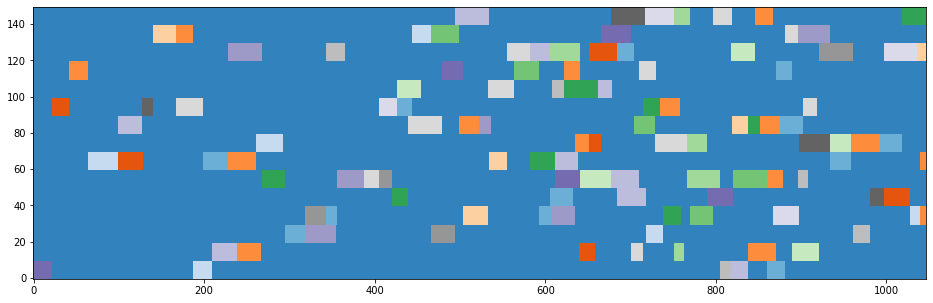

In [8]:
plt.figure(figsize = (16,5))
plt.imshow(genetic.schedule, origin='lower', aspect='auto', interpolation='nearest', cmap='tab20c')

In [27]:
class RandomSampling:
  def __init__(self,num_data,num_fitnes,files,num_iter):
    self.files=files
    self.num_data=num_data
    self.num_fitnes=num_fitnes
    self.num_iter=num_iter
    self.xpoints = []
    self.ypoints = []


  def generateMatrixAleatorio(self,size_array,n,m):
    arr=[]
    for k in range(size_array):
      rep = []
      for i in range(n):
        rep.extend(np.full(m,i))
      np.random.shuffle(rep)
      arr.append(rep)
    return arr

  def run(self):
    with open(self.files) as f:
      n, m = [int(x) for x in f.readline().split()]

    for k in range(self.num_iter):
      arr=self.generateMatrixAleatorio(self.num_data,n,m)
      weight=[]
      weightxxx=[]
      for j in range(self.num_data):
        jssp= JSSP(self.files,arr[j])
        aux = jssp.run('makespan')
        self.schedule = jssp.run('schedule')
        weight.append(aux)
        weightxxx.append(aux)

      auxweight=weight
      indexweight=[]
      for j in range(self.num_fitnes):
        indexweight.append(auxweight.index(min(auxweight)))
        auxweight.insert(auxweight.index(min(auxweight)),2000)
        auxweight.remove(min(auxweight))

      auxsum=0
      for j in range(len(indexweight)):
        auxsum+=weightxxx[indexweight[j]]
      self.xpoints.append(k)
      
      if(len(self.ypoints) == 0):
        self.ypoints.append(weightxxx[indexweight[0]])
      elif(self.ypoints[-1]<weightxxx[indexweight[0]]):
        self.ypoints.append(self.ypoints[-1])
      else:
        self.ypoints.append(weightxxx[indexweight[0]])
    return (self.xpoints,self.ypoints)



In [29]:
rs=RandomSampling(25,6,"demo1",50)
xpointsR, ypointsR= rs.run()

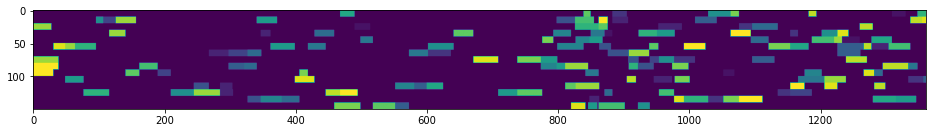

In [30]:
plt.figure(figsize = (16,5))
plt.imshow(rs.schedule)

In [ ]:
#@title Conclusión

En conclusion se puede ver que mediante los algoritmos utilizados se devolvieron una lista de k elementos extraídos sin repetición de la secuencia